In [29]:
from lib_cuwa.lib_CUWA_core import CUWA
from lib_cuwa.gaussian_beam import GaussianBeam
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc 

plt.style.use('rose-pine')

In [31]:
C1 = CUWA(GPU_device_id=None)

In [15]:
beam1 = GaussianBeam(frequency_GHz = 90,
                                  mode          = 'X',
                                  origin        = np.array((0.05,0,0)),
                                  gaussian_focus= np.array((0.15,0.25,0)),
                                  waist_radius  = 0.035)

beam2= GaussianBeam(frequency_GHz = 110,
                                  mode          = 'X',
                                  origin        = np.array((0.0,0.03,0)),
                                  gaussian_focus= np.array((0.2,0.09,0)),
                                  waist_radius  = 0.015)

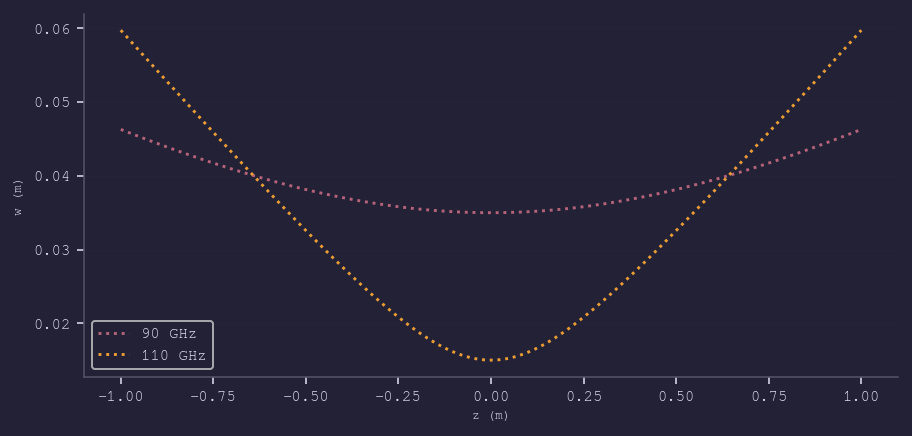

In [23]:
fig, ax = plt.subplots(1,1)
z = np.linspace(-1,1,100)
for beam in [beam1,beam2]:
    wr, zr = beam.Waist_radius, beam.Rayleigh_range
    w = wr*np.sqrt(1+np.square(z/zr))
    ax.plot(z,w, ':', label=f'{beam.frequency_GHz} GHz')
    ax.set_xlabel('z (m)')
    ax.set_ylabel('w (m)')
    ax.legend()
    

In [24]:
X,Y,Z = C1.set_comp_grid(omega_ref = beam2.w_0, 
                    vac_resolution = 12,
                            origin = np.array((0,0,0)), 
                               e_x = np.array((1,0,0)), 
                               e_y = np.array((0,1,0)), 
                           x_range = (0.0,0.25), 
                           y_range = (0.0,0.1), 
                          z_thick  =  0.0)

In [27]:
w_c = sc.e / sc.m_e * 2.4 + 0. * X
w_p = sc.e * np.sqrt(0.3e20 * np.fmax(Y,0)/np.max(Y) /(sc.m_e * sc.epsilon_0))
b_x = b_y = np.zeros_like(X)
b_z = np.ones_like(X)

In [28]:
C1.set_plasma_data(w_p, w_c, b_x, b_y, b_z, rampDown_width=25)
C1.set_antenna(beam,boundary='y_min'); C1.set_antenna(beam2,boundary='x_min')

NameError: name 'gpuarray' is not defined